# First let's import the packages we will use in this project. You can do this all now or as you need them

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv("../input/movies-updatedratingscleaned/movies_UpdatedRatings.csv")


In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,9,PG-13,Animation,2009,"September 9, 2009 (United States)",7.1,135000.0,Shane Acker,Pamela Pettler,Elijah Wood,United States,30000000.0,48428063.0,Focus Features,79.0
1,21,PG-13,Crime,2008,"March 28, 2008 (United States)",6.8,235000.0,Robert Luketic,Peter Steinfeld,Jim Sturgess,United States,35000000.0,159808370.0,Columbia Pictures,123.0
2,31,R,Horror,2016,"September 16, 2016 (United States)",5.1,19000.0,Rob Zombie,Rob Zombie,Malcolm McDowell,United Kingdom,1500000.0,850419.0,Bow and Arrow Entertainment,102.0
3,42,PG-13,Biography,2013,"April 12, 2013 (United States)",7.5,89000.0,Brian Helgeland,Brian Helgeland,Chadwick Boseman,United States,40000000.0,97470701.0,Warner Bros.,128.0
4,54,R,Drama,1998,"August 28, 1998 (United States)",5.8,32000.0,Mark Christopher,Mark Christopher,Ryan Phillippe,United States,13000000.0,16757163.0,Dollface,93.0


# We need to see if we have any missing data. Let's loop through the data and see if there is anything missing

In [3]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


# The original dataset had about 2% missing data for Ratings (77 entries in total). I went back to the original CSV file and copied all of the movie titltes without a rating, ran a script in ChatGPT to extract all of the current movie ratings for each one and cleaned the data in Excel prior to reloading the new dataset.

# For the sake of time, I simply removed the missing data for budget(28%) and gross(2%) below and then re-ran the missing data code.

In [4]:
df = df.dropna()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [5]:
# Data Types for our columns
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<Axes: >

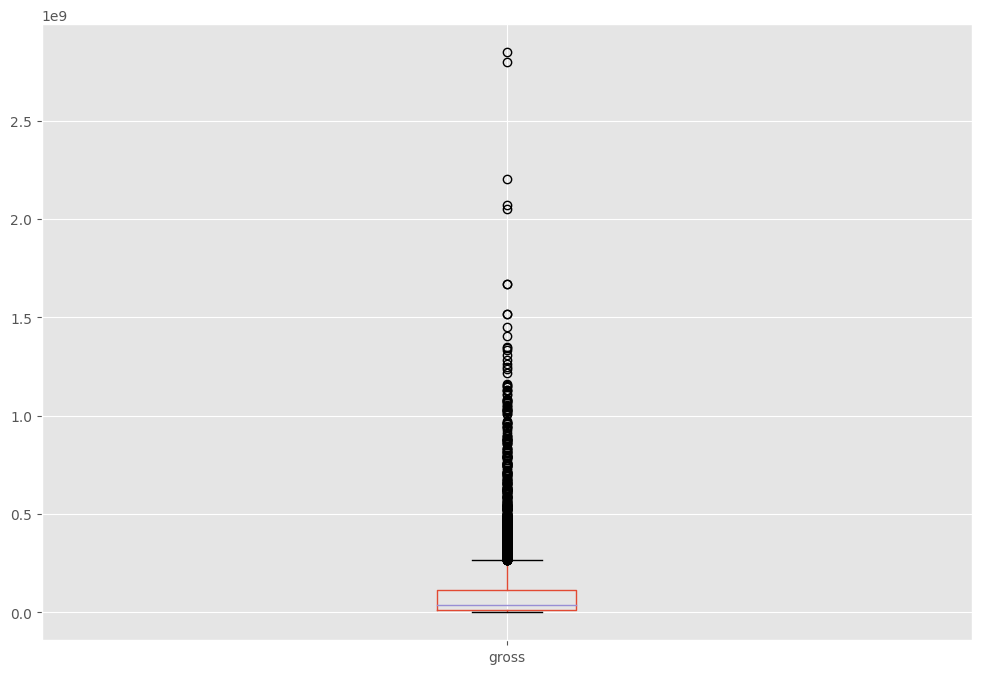

In [6]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [7]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,9,PG-13,Animation,2009,"September 9, 2009 (United States)",7.1,135000.0,Shane Acker,Pamela Pettler,Elijah Wood,United States,30000000.0,4.842806e+07,Focus Features,79.0
1,21,PG-13,Crime,2008,"March 28, 2008 (United States)",6.8,235000.0,Robert Luketic,Peter Steinfeld,Jim Sturgess,United States,35000000.0,1.598084e+08,Columbia Pictures,123.0
2,31,R,Horror,2016,"September 16, 2016 (United States)",5.1,19000.0,Rob Zombie,Rob Zombie,Malcolm McDowell,United Kingdom,1500000.0,8.504190e+05,Bow and Arrow Entertainment,102.0
3,42,PG-13,Biography,2013,"April 12, 2013 (United States)",7.5,89000.0,Brian Helgeland,Brian Helgeland,Chadwick Boseman,United States,40000000.0,9.747070e+07,Warner Bros.,128.0
4,54,R,Drama,1998,"August 28, 1998 (United States)",5.8,32000.0,Mark Christopher,Mark Christopher,Ryan Phillippe,United States,13000000.0,1.675716e+07,Dollface,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7662,Zoolander,PG-13,Comedy,2001,"September 28, 2001 (United States)",6.5,251000.0,Ben Stiller,Drake Sather,Ben Stiller,Germany,28000000.0,6.078098e+07,Paramount Pictures,90.0
7663,Zoolander 2,PG-13,Action,2016,"February 12, 2016 (United States)",4.7,66000.0,Ben Stiller,Justin Theroux,Ben Stiller,United States,50000000.0,5.672269e+07,Panorama Films,101.0
7664,Zoom,PG,Action,2006,"August 11, 2006 (United States)",4.4,19000.0,Peter Hewitt,Adam Rifkin,Tim Allen,United States,35000000.0,1.250636e+07,Revolution Studios,83.0
7665,Zoot Suit,R,Drama,1981,"January 1, 1982 (United States)",6.8,1100.0,Luis Valdez,Luis Valdez,Daniel Valdez,United States,2700000.0,3.256082e+06,Universal Pictures,103.0


In [8]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
540,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
542,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
7043,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
5260,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
543,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0
2262,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0
4244,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0
3475,Madadayo,PG,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000.0,5.960000e+02,DENTSU Music And Entertainment,134.0


<Axes: xlabel='gross', ylabel='budget'>

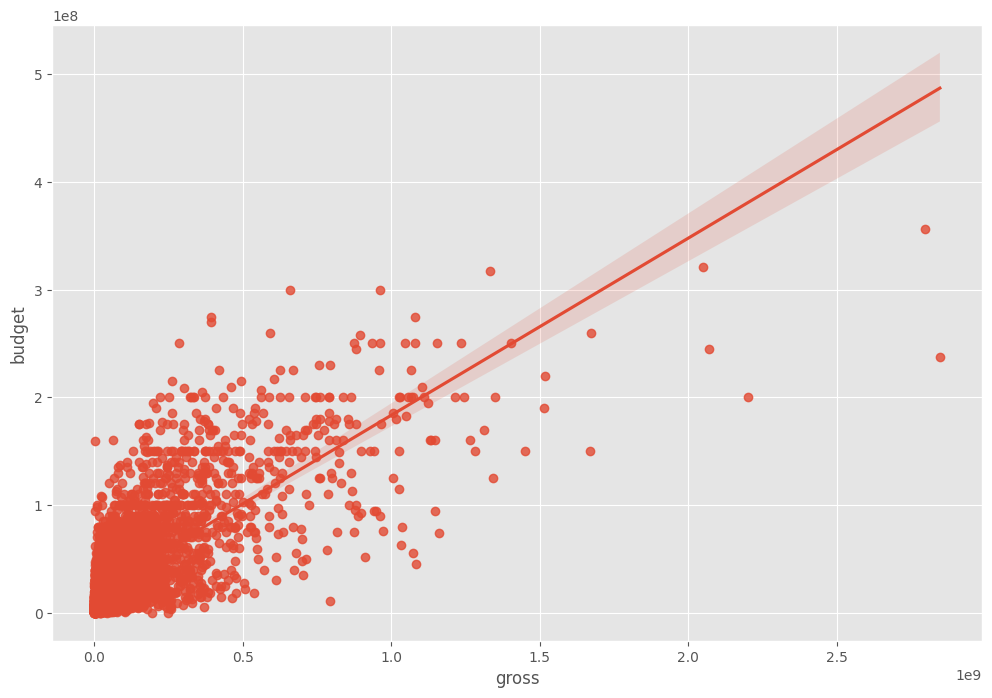

In [9]:
sns.regplot(x="gross", y="budget", data=df)

<Axes: xlabel='score', ylabel='gross'>

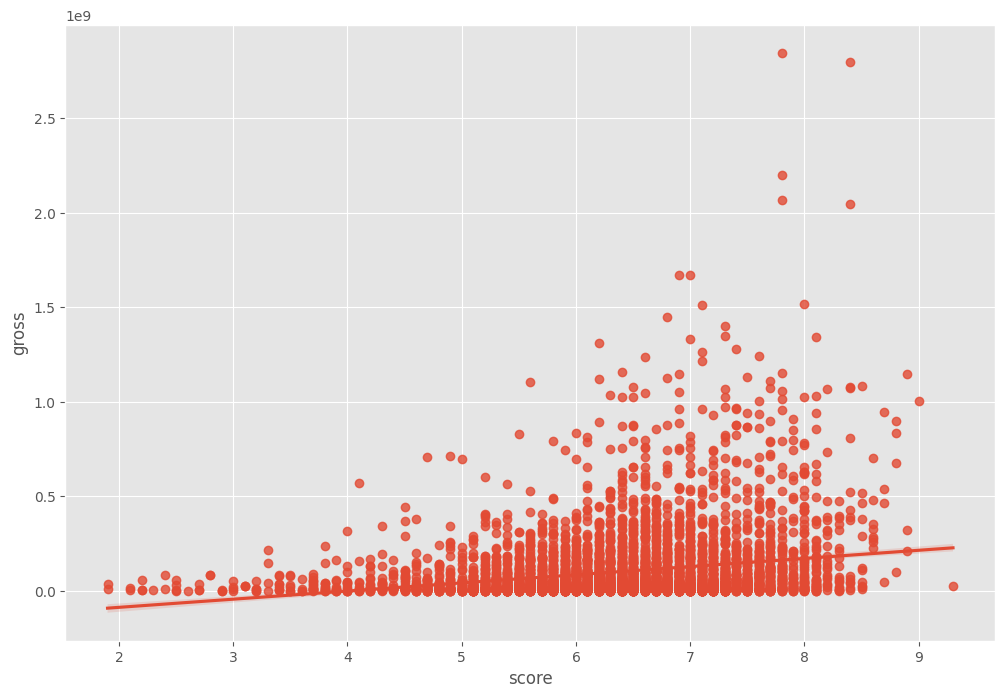

In [10]:
sns.regplot(x="score", y="gross", data=df)

In [11]:
# Correlation Matrix between all numeric columns

df.corr(numeric_only=True,method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.055223,0.205862,0.327888,0.274434,0.074666
score,0.055223,1.000000,0.473687,0.071568,0.221950,0.414463
votes,0.205862,0.473687,1.000000,0.439890,0.614824,0.352322
budget,0.327888,0.071568,0.439890,1.000000,0.740362,0.318423
gross,0.274434,0.221950,0.614824,0.740362,1.000000,0.275470
runtime,0.074666,0.414463,0.352322,0.318423,0.275470,1.000000


In [12]:
df.corr(numeric_only=True,method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.038453,0.296050,0.220980,0.239470,0.064471
score,0.038453,1.000000,0.349940,-0.006854,0.124339,0.292755
votes,0.296050,0.349940,1.000000,0.345729,0.553273,0.205382
budget,0.220980,-0.006854,0.345729,1.000000,0.512367,0.230726
gross,0.239470,0.124339,0.553273,0.512367,1.000000,0.176515
runtime,0.064471,0.292755,0.205382,0.230726,0.176515,1.000000


In [13]:
df.corr(numeric_only=True,method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056349,0.426916,0.313246,0.350982,0.094939
score,0.056349,1.000000,0.495117,-0.010627,0.182296,0.412861
votes,0.426916,0.495117,1.000000,0.492822,0.745476,0.300636
budget,0.313246,-0.010627,0.492822,1.000000,0.693361,0.330051
gross,0.350982,0.182296,0.745476,0.693361,1.000000,0.256694
runtime,0.094939,0.412861,0.300636,0.330051,0.256694,1.000000


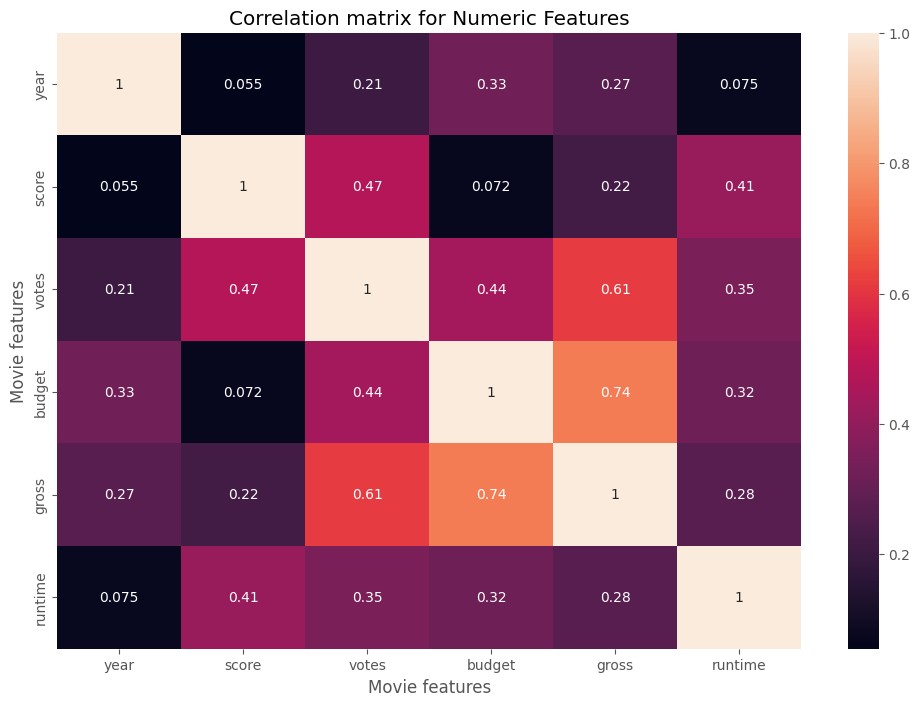

In [14]:
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [15]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(numeric_only=True, method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.006153,-0.015994,-0.000030,0.511411,-0.000642,0.133667,0.391872,0.608118,0.354628,0.053319,0.088344,0.999267,0.269981,0.012739
rating,0.006153,1.000000,-0.140632,0.049701,0.023211,-0.028902,-0.052258,0.065616,0.041438,0.123262,0.076885,0.020983,0.005802,0.121380,0.005808
genre,-0.015994,-0.140632,1.000000,0.048867,-0.000297,0.062908,-0.022978,-0.070904,-0.003947,-0.036936,-0.059717,-0.023813,-0.016457,-0.044268,-0.082889
year,-0.000030,0.049701,0.048867,1.000000,0.024110,0.024275,-0.030221,-0.000436,0.033689,0.010672,-0.010202,0.029292,-0.000144,0.036553,-0.021869
released,0.511411,0.023211,-0.000297,0.024110,1.000000,0.006513,0.113754,0.239538,0.365407,0.239358,0.049192,0.102371,0.510029,0.166013,0.019008
score,-0.000642,-0.028902,0.062908,0.024275,0.006513,1.000000,0.030532,0.027446,0.018680,0.045287,0.003887,-0.019155,-0.000142,-0.028801,0.035882
votes,0.133667,-0.052258,-0.022978,-0.030221,0.113754,0.030532,1.000000,-0.000683,0.035390,0.007729,-0.025347,0.094932,0.134045,-0.036442,0.098178
director,0.391872,0.065616,-0.070904,-0.000436,0.239538,0.027446,-0.000683,1.000000,0.411915,0.339757,0.096773,0.036076,0.392119,0.286208,-0.020298
writer,0.608118,0.041438,-0.003947,0.033689,0.365407,0.018680,0.035390,0.411915,1.000000,0.299358,0.088249,0.047146,0.607406,0.246453,0.012224
star,0.354628,0.123262,-0.036936,0.010672,0.239358,0.045287,0.007729,0.339757,0.299358,1.000000,0.106303,0.091502,0.354065,0.263400,0.001294


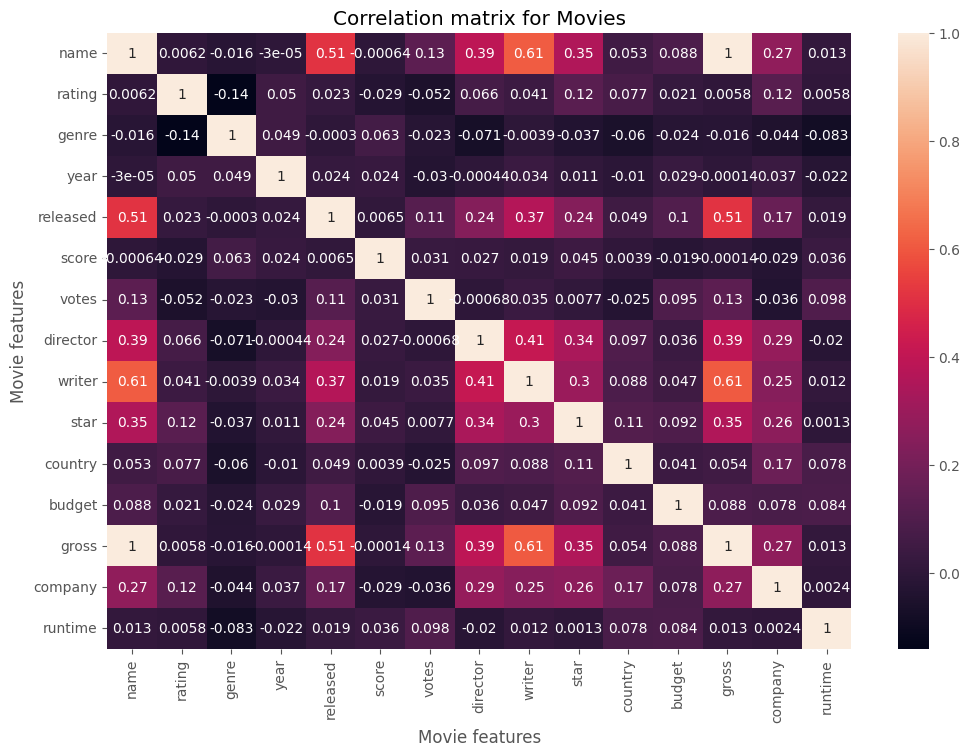

In [16]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(numeric_only=True, method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [17]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating      0.006153
         genre      -0.015994
         year       -0.000030
         released    0.511411
                       ...   
runtime  country     0.078257
         budget      0.083861
         gross       0.012945
         company     0.002387
         runtime     1.000000
Length: 225, dtype: float64


In [18]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre    rating     -0.140632
rating   genre      -0.140632
runtime  genre      -0.082889
genre    runtime    -0.082889
         director   -0.070904
                       ...   
year     year        1.000000
genre    genre       1.000000
rating   rating      1.000000
company  company     1.000000
runtime  runtime     1.000000
Length: 225, dtype: float64


In [19]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

gross     released    0.510029
released  gross       0.510029
          name        0.511411
name      released    0.511411
writer    gross       0.607406
gross     writer      0.607406
writer    name        0.608118
name      writer      0.608118
gross     name        0.999267
name      gross       0.999267
          name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64


In [20]:
# Looking at the top 15 companies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54773202654
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19628786232
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [21]:
df['Year'] = df['released'].astype(str).str[:4]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,9,PG-13,Animation,2009,"September 9, 2009 (United States)",7.1,135000.0,Shane Acker,Pamela Pettler,Elijah Wood,United States,30000000.0,48428063.0,Focus Features,79.0,Sept
1,21,PG-13,Crime,2008,"March 28, 2008 (United States)",6.8,235000.0,Robert Luketic,Peter Steinfeld,Jim Sturgess,United States,35000000.0,159808370.0,Columbia Pictures,123.0,Marc
2,31,R,Horror,2016,"September 16, 2016 (United States)",5.1,19000.0,Rob Zombie,Rob Zombie,Malcolm McDowell,United Kingdom,1500000.0,850419.0,Bow and Arrow Entertainment,102.0,Sept
3,42,PG-13,Biography,2013,"April 12, 2013 (United States)",7.5,89000.0,Brian Helgeland,Brian Helgeland,Chadwick Boseman,United States,40000000.0,97470701.0,Warner Bros.,128.0,Apri
4,54,R,Drama,1998,"August 28, 1998 (United States)",5.8,32000.0,Mark Christopher,Mark Christopher,Ryan Phillippe,United States,13000000.0,16757163.0,Dollface,93.0,Augu


In [22]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                             year             
"DIA" Productions GmbH & Co. KG     2003   44350926.0
"Weathering With You" Film Partners 2019  193457467.0
.406 Production                     1996      10580.0
1492 Pictures                       1996  129832389.0
                                    1999   87423861.0
...                                               ...
erbp                                2013     587174.0
i am OTHER                          2015   17986781.0
i5 Films                            2001   10031529.0
micro_scope                         2010    7099598.0
thefyzz                             2017   62198461.0

[2996 rows x 1 columns]

In [23]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Warner Bros.           2005    2688767210
Name: gross, dtype: int64

In [24]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54773202654
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19628786232
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

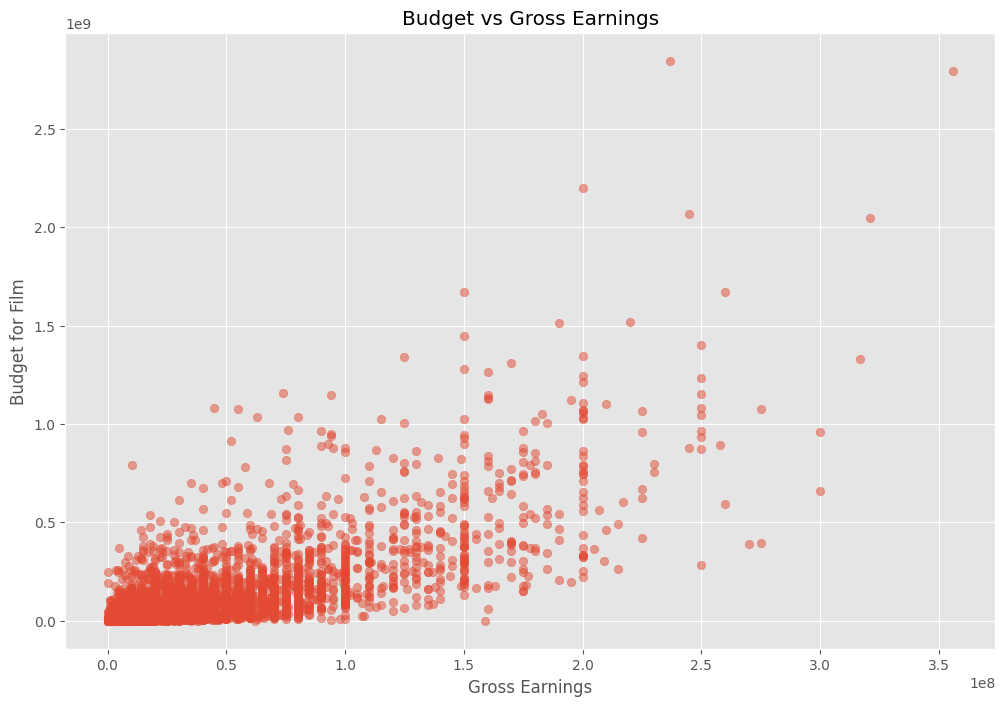

In [25]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

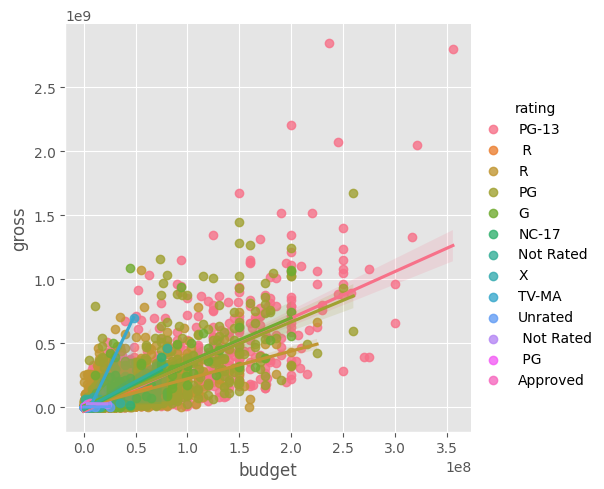

In [26]:
sns.lmplot(x='budget', y='gross', hue='rating', data=df)

In [27]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,66,8,2,2009,2563,7.1,135000.0,1768,2308,497,47,30000000.0,4.842806e+07,671,79.0,16
1,29,8,5,2008,1638,6.8,235000.0,1665,2416,836,47,35000000.0,1.598084e+08,454,123.0,12
2,48,2,9,2016,2407,5.1,19000.0,1644,2546,1142,46,1500000.0,8.504190e+05,284,102.0,16
3,51,8,3,2013,32,7.5,89000.0,213,358,260,47,40000000.0,9.747070e+07,1431,128.0,5
4,59,9,6,1998,368,5.8,32000.0,1236,1941,1523,47,13000000.0,1.675716e+07,540,93.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7662,5336,8,4,2001,2502,6.5,251000.0,144,836,148,15,28000000.0,6.078098e+07,1113,90.0,16
7663,5337,8,0,2016,696,4.7,66000.0,144,1675,148,47,50000000.0,5.672269e+07,1107,101.0,8
7664,5338,7,0,2006,237,4.4,19000.0,1518,33,1718,47,35000000.0,1.250636e+07,1208,83.0,6
7665,5339,9,6,1981,848,6.8,1100.0,1200,1891,380,47,2700000.0,3.256082e+06,1402,103.0,9


In [28]:
df_numerized.corr(numeric_only=True, method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.000000,-0.023375,0.010247,0.024901,-0.006258,0.014785,0.012817,0.013827,0.011492,-0.007576,-0.025544,0.023586,0.005876,0.021225,0.010341,-0.007553
rating,-0.023375,1.000000,0.126498,0.027743,0.016210,0.055379,0.005995,0.021398,-0.002573,-0.002019,0.012339,-0.178408,-0.165021,-0.080242,0.131150,0.014012
genre,0.010247,0.126498,1.000000,-0.073368,0.021896,0.034258,-0.136313,-0.009717,0.017830,0.003617,-0.009143,-0.368763,-0.244339,-0.072928,-0.059415,0.021161
year,0.024901,0.027743,-0.073368,1.000000,-0.001200,0.055223,0.205862,-0.036908,-0.025201,-0.032861,-0.065406,0.327888,0.274434,-0.014062,0.074666,-0.004490
released,-0.006258,0.016210,0.021896,-0.001200,1.000000,0.046174,0.029057,0.003140,0.008096,0.015204,-0.017232,0.020011,0.008627,-0.002787,0.008438,0.996188
score,0.014785,0.055379,0.034258,0.055223,0.046174,1.000000,0.473687,0.005779,0.012870,0.008576,-0.045014,0.071568,0.221950,0.020461,0.414463,0.045348
votes,0.012817,0.005995,-0.136313,0.205862,0.029057,0.473687,1.000000,-0.009977,-0.005346,-0.017599,0.041844,0.439890,0.614824,0.118979,0.352322,0.027748
director,0.013827,0.021398,-0.009717,-0.036908,0.003140,0.005779,-0.009977,1.000000,0.262997,0.036809,0.011764,-0.009069,-0.029182,-0.006770,0.018369,0.004359
writer,0.011492,-0.002573,0.017830,-0.025201,0.008096,0.012870,-0.005346,0.262997,1.000000,0.019085,0.022741,-0.039477,-0.035969,-0.003013,-0.016678,0.007683
star,-0.007576,-0.002019,0.003617,-0.032861,0.015204,0.008576,-0.017599,0.036809,0.019085,1.000000,-0.011377,-0.021857,-0.000406,0.014092,0.011700,0.014394


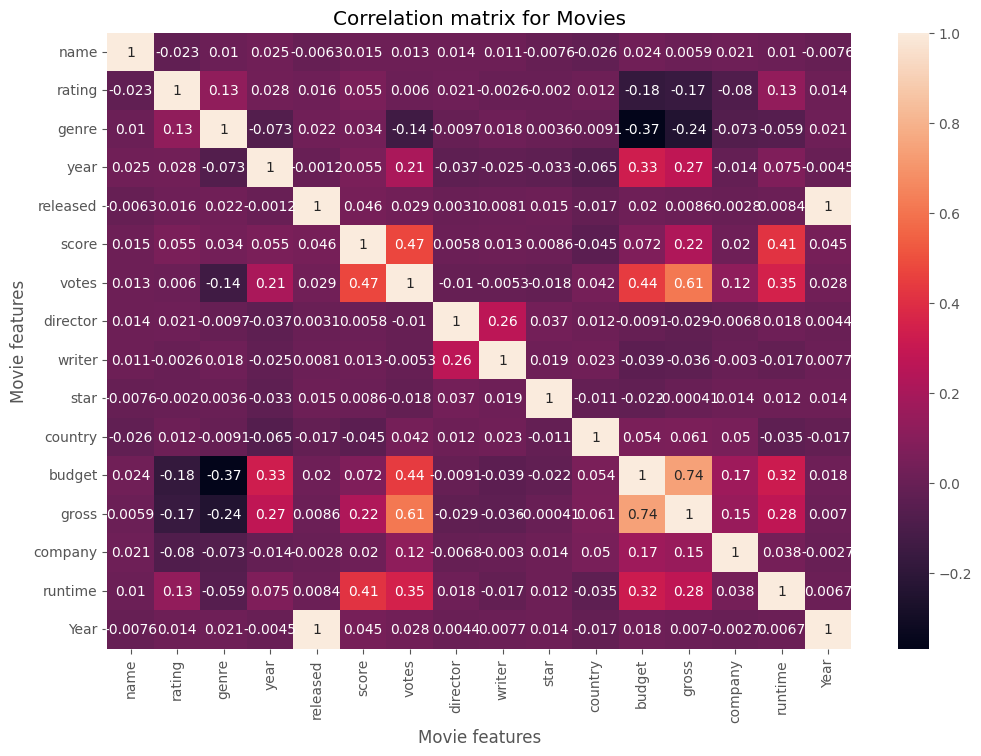

In [29]:
correlation_matrix = df_numerized.corr(numeric_only=True, method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()